# Assessed Exercise: Option 2 Hubble Constant

## Part A: Simple linear regression models

Hubble's Law is often expressed using the equation:

v = H0 * d

where:
- v represents the velocity of recession of a galaxy,
- H0 is the Hubble constant, which represents the rate of expansion of the universe,
- d is the distance to the galaxy.


In [8]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

#Loading the data
hubble1 = pd.read_csv('Ex_Hubble1.csv')

#initial inspection of the data
hubble1.head()

,Object,Distance [Mpc],Sta. Desv. [Mpc],Method,"Velocity, cz [km s-1]",Uncert. [km s-1],z reference
0,SDSS-II SN 16111,824.0,NaN,SNIa,64455.38,NaN,2011ApJ...738..162S
1,SDSS-II SN 03957,547.0,NaN,SNIa,41071.57,NaN,2011ApJ...738..162S
2,2MASX J23024668+0848186,170.0,NaN,SNIa,11991.70,NaN,2011CBET.2931A...1B
3,SDSS-II SN 15080,969.0,NaN,SNIa,77646.25,NaN,2011ApJ...738..162S
4,UGC 11750,148.0,NaN,Tully-Fisher,12727.09,33.88,2012ApJS..199...26H


In [9]:
#Extraction of the relavant columns to the task in hand
distance = hubble1['Distance [Mpc]']
velocity = hubble1['Velocity, cz [km s-1]']

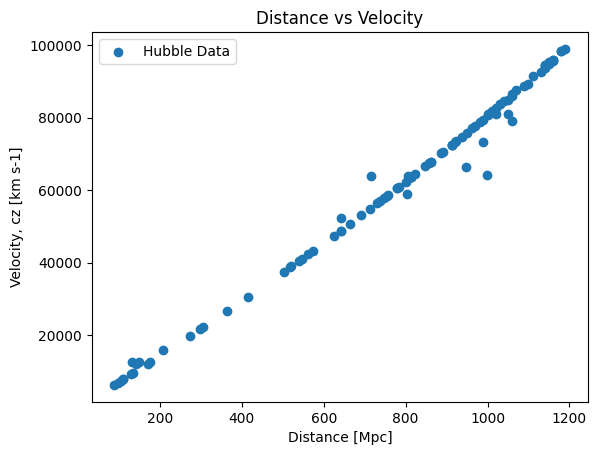

In [10]:
#creation of the hubble plot
fig,ax = plt.subplots()
ax.scatter(distance, velocity, label='Hubble Data')
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity, cz [km s-1]')
ax.set_title('Distance vs Velocity')
ax.legend()

From the above graph, we see somewhat of a linear relationship, we will calculate some regression models to try and understand what we are seeing in more depth.

Regression Equation for the whole data set: Y = 82.55 * X + -2585.91


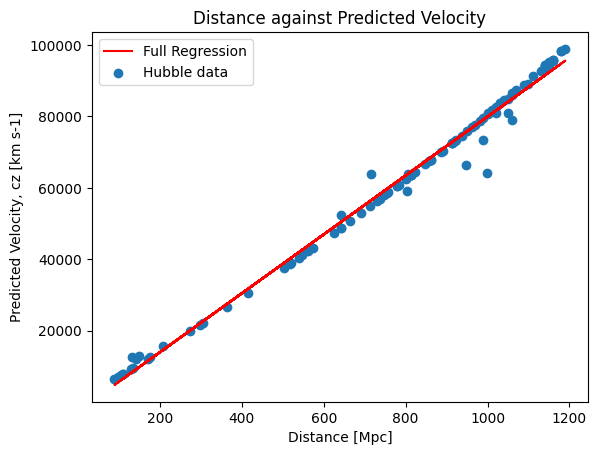

In [11]:
#Initially performing a linear regression for the whole data set
regression_full = LinearRegression()
#Fitting the linear regression model and reshaping distance in order to get it into the correct format.
distanceReshaped = np.array(distance).reshape(-1,1)
regression_full.fit(distanceReshaped, velocity)
predicted_full = regression_full.predict(distanceReshaped)


#Plotting out the distance vs the predicted velocity - the results of the linear regression model
fig, ax = plt.subplots()
ax.plot(distance, predicted_full, color = 'red', label='Full Regression')
ax.scatter(distance, velocity, label = 'Hubble data')
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Predicted Velocity, cz [km s-1]')
ax.set_title('Distance against Predicted Velocity')
ax.legend()

# Getting the coefficients and intercept from the model
coefficients = regression_full.coef_
intercept = regression_full.intercept_

# Printing the regression equation
print("Regression Equation for the whole data set: Y =", round(coefficients[0], 2), "* X +", round(intercept, 2))

0.9901132856350136


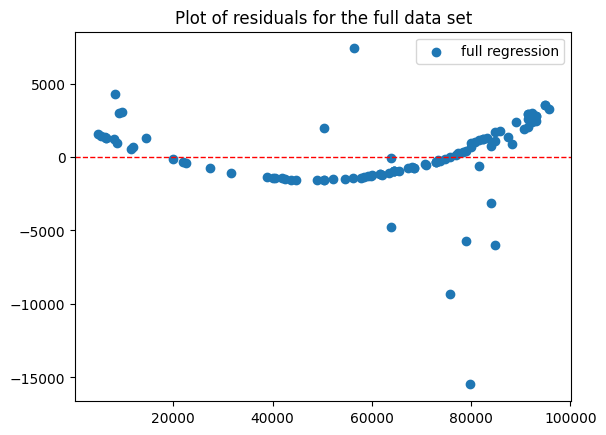

In [12]:
#Assessment of the model fit for the full data set
#calculating the r2 score
r2_full = r2_score(velocity, predicted_full)
print(r2_full)
#calculating residuals
residuals = velocity - predicted_full
fig,ax = plt.subplots()
ax.scatter(predicted_full, residuals, label = 'full regression')
ax.axhline(linewidth = 1, color = 'r', ls ='--')
ax.set_title('Plot of residuals for the full data set')
ax.legend()

Text(0.5, 1.0, 'Linear regression model for the subset')

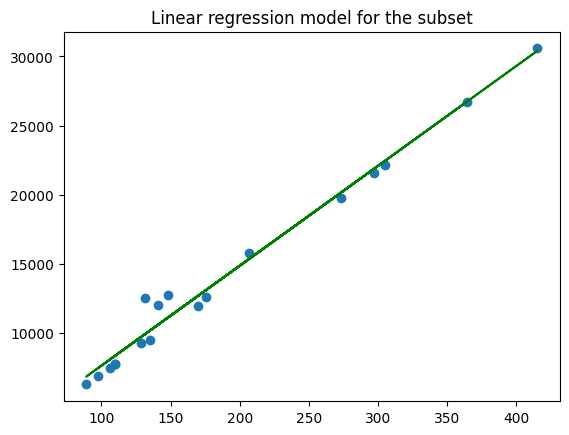

In [13]:
#Investigation of a subset of the data
subset_hubble1 = hubble1[hubble1['Distance [Mpc]'] < 500]
subset_hubble1_distance = subset_hubble1['Distance [Mpc]']
subset_hubble1_velocity = subset_hubble1['Velocity, cz [km s-1]']

#Performing a secondary linear regression on the subset of the data
regression_subset = LinearRegression()
distance_subset_reshaped = np.array(subset_hubble1_distance).reshape(-1,1)
regression_subset.fit(distance_subset_reshaped, subset_hubble1_velocity)
predicted_subset = regression_subset.predict(distance_subset_reshaped)

# Plotting the subset regression
fig, ax = plt.subplots()
ax.plot(subset_hubble1_distance, predicted_subset, color = 'green',  label='subset regression')
ax.scatter(subset_hubble1_distance, subset_hubble1_velocity)
ax.set_title('Linear regression model for the subset')


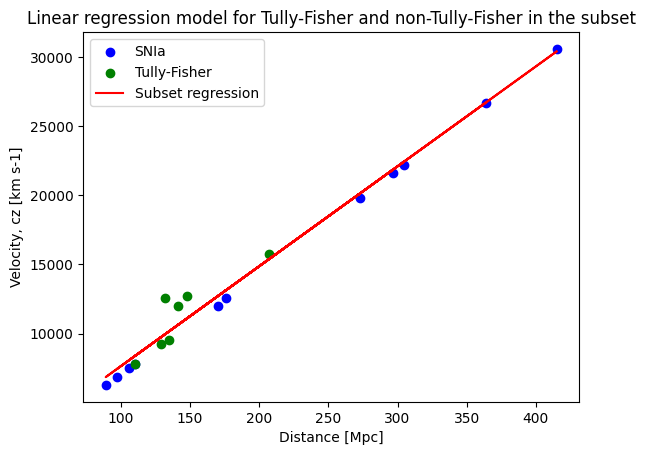

In [14]:

# Separating Tully-Fisher and SNIa points in the subset
tully_fisher_subset = subset_hubble1[subset_hubble1['Method'] == 'Tully-Fisher']
snia_subset = subset_hubble1[subset_hubble1['Method'] == 'SNIa']

# Extracting data for Tully-Fisher and SNIa points
tf_distance_subset = tully_fisher_subset['Distance [Mpc]']
tf_velocity_subset = tully_fisher_subset['Velocity, cz [km s-1]']
snia_distance_subset = snia_subset['Distance [Mpc]']
snia_velocity_subset = snia_subset['Velocity, cz [km s-1]']

# Creating a scatter plot for SNIa points in the subset
plt.scatter(snia_distance_subset, snia_velocity_subset, label='SNIa', color='blue')
# Creating a scatter plot for Tully-Fisher points in the subset
plt.scatter(tf_distance_subset, tf_velocity_subset, label='Tully-Fisher', color='green')
# Adding regression lines for both Tully-Fisher and SNIa in the subset
plt.plot(subset_hubble1_distance, predicted_subset, color='red', label='Subset regression')
plt.title('Linear regression model for Tully-Fisher and non-Tully-Fisher in the subset')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity, cz [km s-1]')
plt.legend()
plt.show()


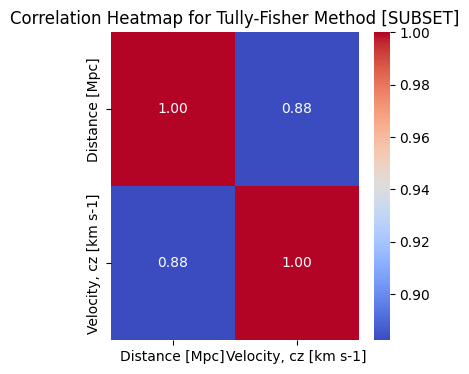

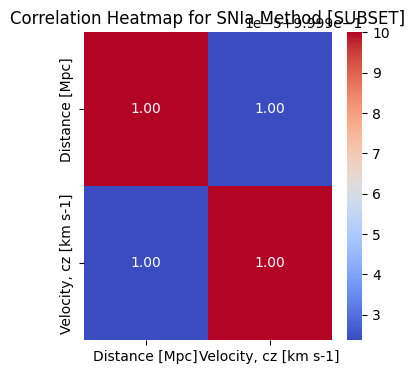

The r^2 score for the SNIa subset 0.9998473350550157


In [15]:
# Creating a heatmap for the correlation between Distance and Velocity (Tully-Fisher)
plt.figure(figsize=(4, 4))
sns.heatmap(tully_fisher_subset[['Distance [Mpc]', 'Velocity, cz [km s-1]']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Tully-Fisher Method [SUBSET]")
plt.show()

# Extracing velocity and distance coloumns from the snia subset
snia_data_subset_velocity = snia_subset['Velocity, cz [km s-1]']
snia_data_subset_distance = snia_subset['Distance [Mpc]']

# Creating a heatmap for the correlation between Distance and Velocity (SNIa)
plt.figure(figsize=(4, 4))
sns.heatmap(snia_subset[['Distance [Mpc]', 'Velocity, cz [km s-1]']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for SNIa Method [SUBSET]")
plt.show()

# Perform linear regression on snia points in the subset
regression_snia_subset = LinearRegression()
snia_distance_reshaped_subset = np.array(snia_data_subset_distance).reshape(-1, 1)
regression_snia_subset.fit(snia_distance_reshaped_subset, snia_data_subset_velocity)
predicted_snia_subset = regression_snia_subset.predict(snia_distance_reshaped_subset)

#Assess model fit for the subset for snia
r2_subset = r2_score(snia_data_subset_velocity, predicted_snia_subset)
print('The r^2 score for the SNIa subset', r2_subset)



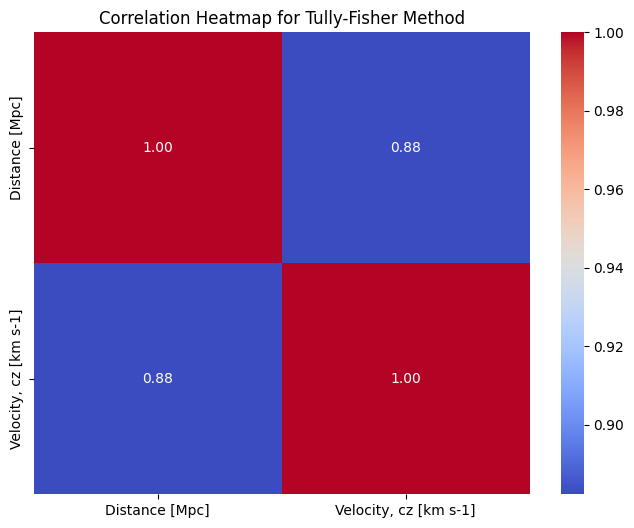

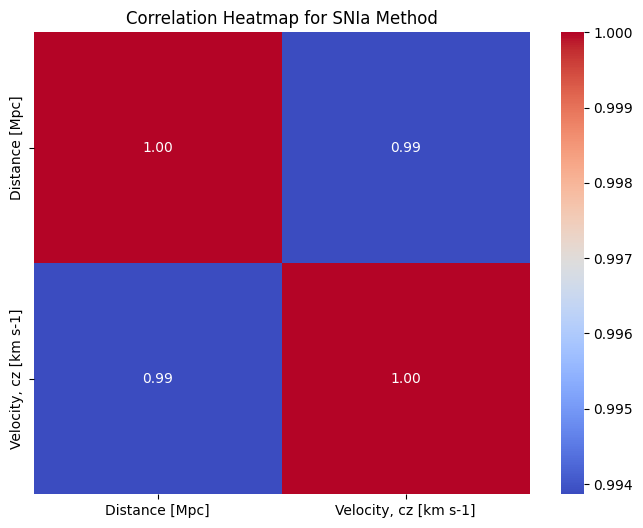

In [43]:
# Filtering the data for 'Tully-Fisher' method on the full data set
tully_fisher_data = hubble1[hubble1['Method'] == 'Tully-Fisher']

# Creating a heatmap for the correlation between Distance and Velocity (Tully-Fisher) on the full data set
plt.figure(figsize=(8, 6))
sns.heatmap(tully_fisher_data[['Distance [Mpc]', 'Velocity, cz [km s-1]']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Tully-Fisher Method")
plt.show()

# Filtering data for 'SNIa' method on the full data set
snia_data = hubble1[hubble1['Method'] == 'SNIa']

# Creating a heatmap for the correlation between Distance and Velocity (SNIa) on the full data set
plt.figure(figsize=(8, 6))
sns.heatmap(snia_data[['Distance [Mpc]', 'Velocity, cz [km s-1]']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for SNIa Method")
plt.show()

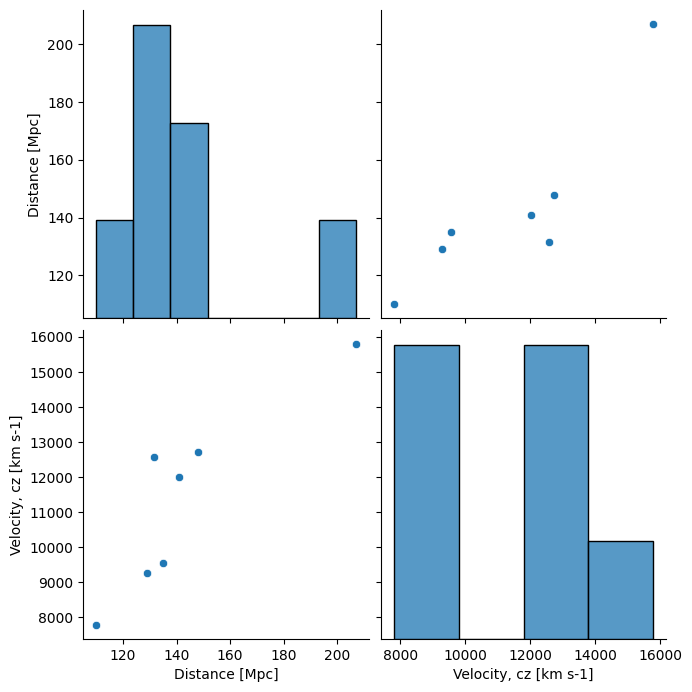

In [44]:
# Creating a pairplot for tully fisher data
pp = sns.pairplot(tully_fisher_data, vars = ['Distance [Mpc]', 'Velocity, cz [km s-1]'], height=3.5)



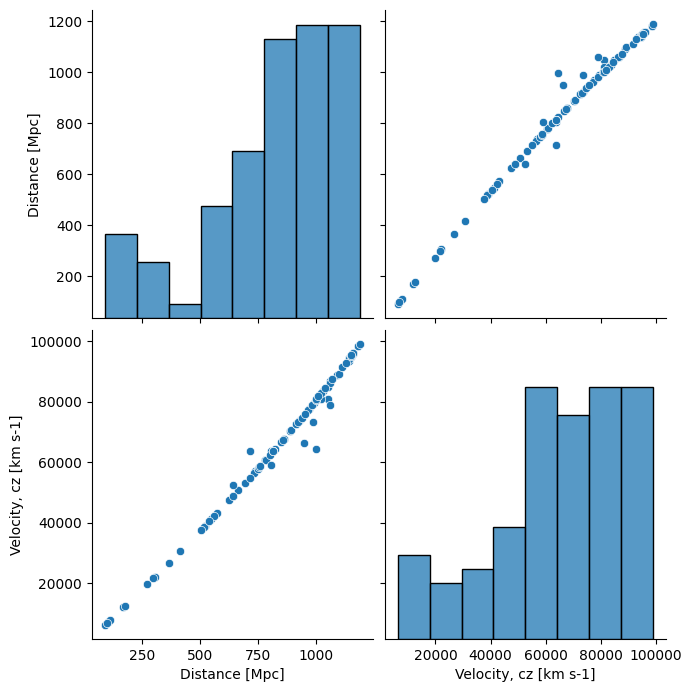

In [45]:
# Creating a pairplot for snia data
pp2 = sns.pairplot(snia_data, vars = ['Distance [Mpc]', 'Velocity, cz [km s-1]'], height=3.5)


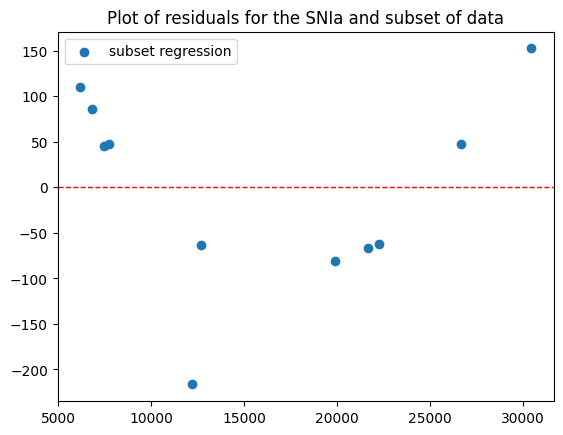

In [16]:
#calculating residuals for the SNIa subset

residuals_subset_snia = snia_data_subset_velocity - predicted_snia_subset
fig,ax = plt.subplots()
ax.scatter(predicted_snia_subset, residuals_subset_snia, label='subset regression')
ax.axhline(linewidth = 1, color = 'r', ls ='--')
ax.set_title('Plot of residuals for the SNIa and subset of data')
ax.legend()

The Hubble Constant for the SNIa subset  74.35982647654737


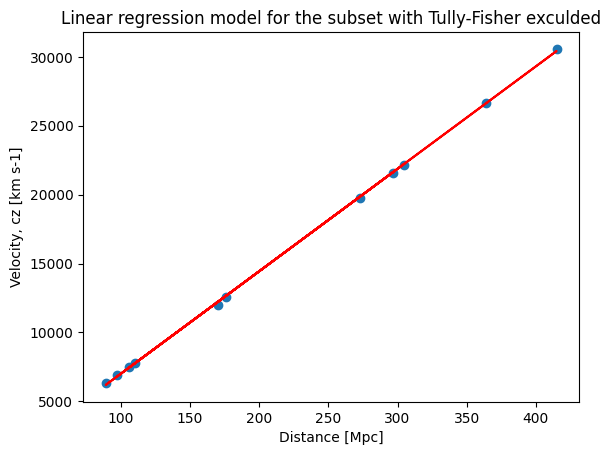

In [34]:
# Plotting the linear regression model for the subset with Tully-Fisher exculded
fig, ax = plt.subplots()
ax.plot(snia_data_subset_distance, predicted_snia_subset, color = 'red')
ax.scatter(snia_data_subset_distance, snia_data_subset_velocity)
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity, cz [km s-1]')
ax.set_title('Linear regression model for the subset with Tully-Fisher exculded')
hubble_constant_subset_snia = regression_snia_subset.coef_[0]
print('The Hubble Constant for the SNIa subset ', hubble_constant_subset_snia)


0.9829318205914828


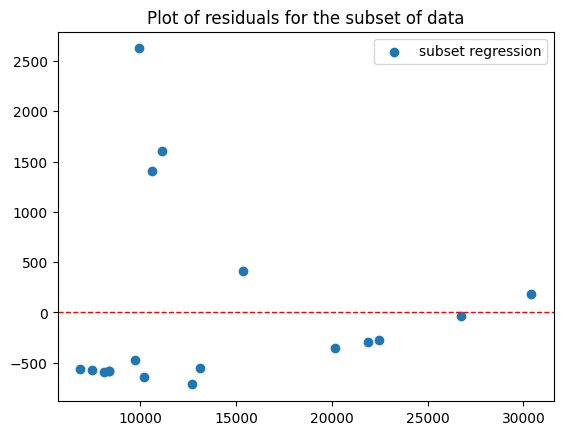

In [18]:
#Assessing model fit for the subset
r2_subset = r2_score(subset_hubble1_velocity, predicted_subset)
print('The R^2 score for the subset of data with Tully-Fisher inlcluded', r2_subset)
#calculating residuals for the whole subset
residuals_subset = subset_hubble1_velocity - predicted_subset
fig,ax = plt.subplots()
ax.scatter(predicted_subset, residuals_subset, label='subset regression')
ax.axhline(linewidth = 1, color = 'r', ls ='--')
ax.set_title('Plot of residuals for the subset of data')
ax.legend()


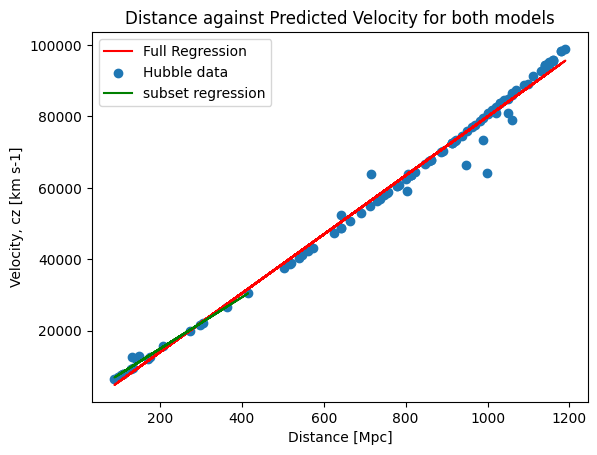

In [35]:
# Plotting both models on the same figure
fig, ax = plt.subplots()
ax.plot(distance, predicted_full, color = 'red', label='Full Regression')
ax.scatter(distance, velocity, label = 'Hubble data')
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity, cz [km s-1]')
ax.set_title('Distance against Predicted Velocity for both models')
ax.plot(subset_hubble1_distance, predicted_subset, color = 'green',  label='subset regression')
ax.legend()

In [20]:
#Calculation of the hubble constant for the full data set
hubble_constant_full = regression_full.coef_[0]
#Calculation of the hubble constant for a subset of the data
hubble_constant_subset = regression_subset.coef_[0]

print(f'Hubble Constant (Full Dataset): {hubble_constant_full:.2f} km/s/Mpc')
print(f'Hubble Constant (Subset < 500 Mpc): {hubble_constant_subset:.2f} km/s/Mpc')
print(f'R-squared (Full Dataset): {r2_full:.2f}')
print(f'R-squared (Subset < 500 Mpc): {r2_subset:.2f}')


Hubble Constant (Full Dataset): 82.55 km/s/Mpc
Hubble Constant (Subset < 500 Mpc): 72.19 km/s/Mpc
R-squared (Full Dataset): 0.99
R-squared (Subset < 500 Mpc): 0.98


77.47


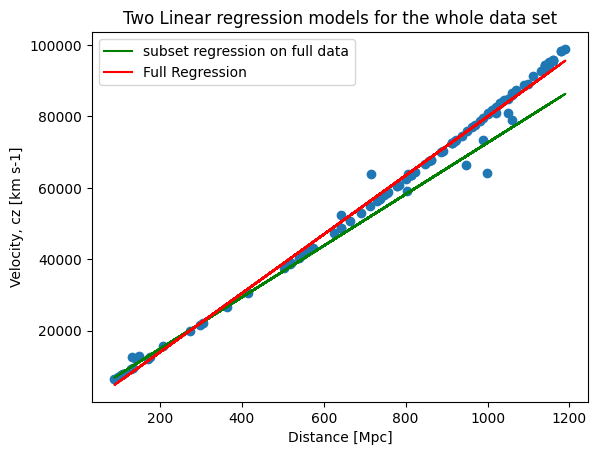

In [21]:
# Predicting the full data set using the model created by the subset
predicted_subset_fulldata = regression_subset.predict(distanceReshaped)
# Plotting both models on the same figure
fig, ax = plt.subplots()
ax.plot(distance, predicted_subset_fulldata, color = 'green',  label='subset regression on full data')
ax.scatter(distance, velocity)
ax.set_title('Two Linear regression models for the whole data set')
ax.plot(distance, predicted_full, color = 'red', label='Full Regression')
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity, cz [km s-1]')
ax.legend()
print(66.29+11.18)

It is clear from the above graph that using the model developed from the subset of data does not apply well to the whole data set.

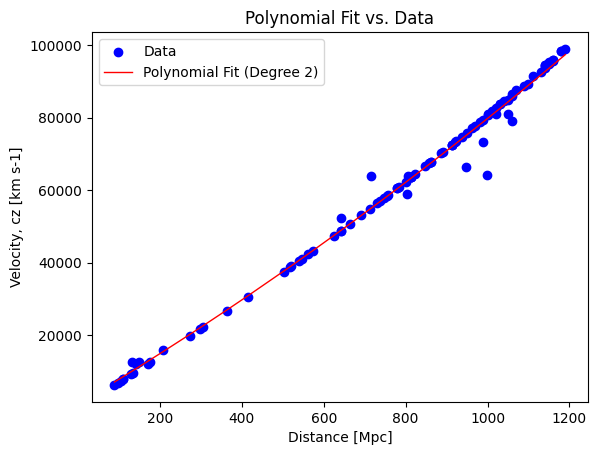

In [36]:
# Investigation of a polynomial fit.

# Finding unique values and their indices
unique_distance, unique_indices = np.unique(distance, return_index=True)
unique_velocity = velocity[unique_indices]

# Fitting a quadratic polynomial
degree = 2 
coefficients = np.polyfit(unique_distance, unique_velocity, degree)
poly_fit = np.polyval(coefficients, unique_distance)

# Calculating residuals
residuals = unique_velocity - poly_fit


# Creating a plot of the fit against the data
fig, ax = plt.subplots()
ax.scatter(distance, velocity, c='b', label='Data')
ax.plot(unique_distance, poly_fit, c='r', label=f'Polynomial Fit (Degree {degree})', linewidth = 1)
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity, cz [km s-1]')
ax.set_title('Polynomial Fit vs. Data')
ax.legend()




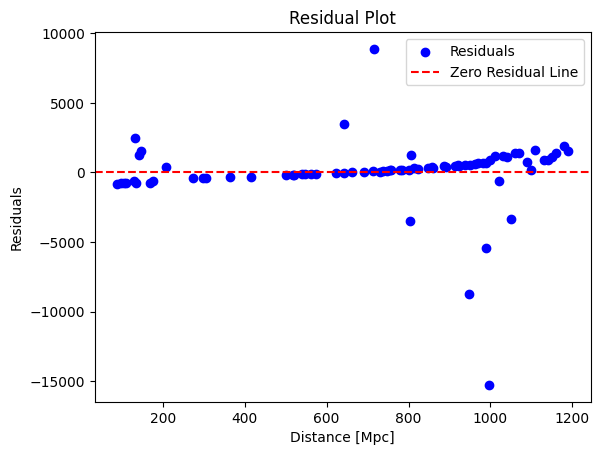

In [37]:
# Creating a residual plot
fig, ax = plt.subplots()
ax.scatter(unique_distance, residuals, c='b', label='Residuals')
ax.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')
ax.legend()




As we can see from the residual plot, the polynomial fit works better.

## Part B: Statistical measures of location and variability

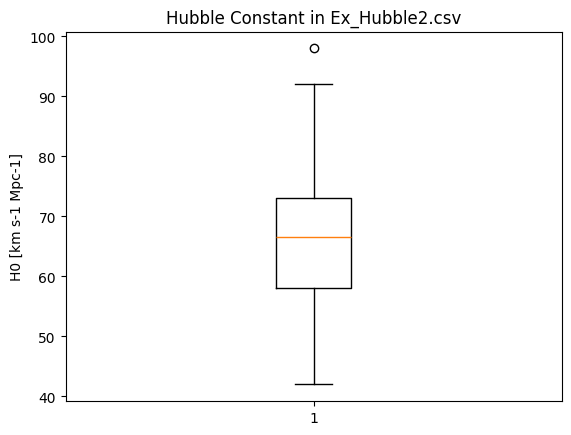

Statistical Measures for Hubble Constant in Ex_Hubble2.csv:
Mean: 66.29 km/s/Mpc
Standard Deviation: 11.18 km/s/Mpc
Median: 66.50 km/s/Mpc
Value from Part a) full regression): 82.55 km/s/Mpc
Value from Part a) subset regression): 72.19 km/s/Mpc


In [24]:
# Loading Ex_Hubble2.csv
hubble2 = pd.read_csv('Ex_Hubble2.csv')

# Calculating statistical measures for Hubble's constant 
mean_hubble2 = np.mean(hubble2['H0 [km s-1 Mpc-1]'])
std_dev_hubble2 = np.std(hubble2['H0 [km s-1 Mpc-1]'])
median_hubble2 = np.median(hubble2['H0 [km s-1 Mpc-1]'])



# Creating a box plot for Hubble's constant
plt.boxplot(hubble2['H0 [km s-1 Mpc-1]'])
plt.ylabel('H0 [km s-1 Mpc-1]')
plt.title('Hubble Constant in Ex_Hubble2.csv')
plt.show()

print(f'Statistical Measures for Hubble Constant in Ex_Hubble2.csv:')
print(f'Mean: {mean_hubble2:.2f} km/s/Mpc')
print(f'Standard Deviation: {std_dev_hubble2:.2f} km/s/Mpc')
print(f'Median: {median_hubble2:.2f} km/s/Mpc')

print(f"Value from Part a) full regression): {hubble_constant_full:.2f} km/s/Mpc")
print(f"Value from Part a) subset regression): {hubble_constant_subset:.2f} km/s/Mpc")


## Scientific context and the reliability of measurements 

In [46]:
# Creating a dictionary to store DataFrames for each unique 'Type'
dataframes = {type_val: hubble2[hubble2['Type'] == type_val] for type_val in hubble2['Type'].unique()}

# Initializing the dictionaries to store calculated values
upper_75_percentiles = {}
lower_25_percentiles = {}
mean_values = {}
plus_errors = {}
minus_errors = {}

# Calculating the mean value, absolute mean error, and quartiles for each DataFrame
for type_val, df in dataframes.items():
    minus_errors[type_val] = df['errors (-)'].abs().mean()
    upper_75_percentiles[type_val] = df['H0 [km s-1 Mpc-1]'].quantile(0.75)
    lower_25_percentiles[type_val] = df['H0 [km s-1 Mpc-1]'].quantile(0.25)
    mean_values[type_val] = df['H0 [km s-1 Mpc-1]'].mean()
    plus_errors[type_val] = df['errors (+)'].abs().mean()
    


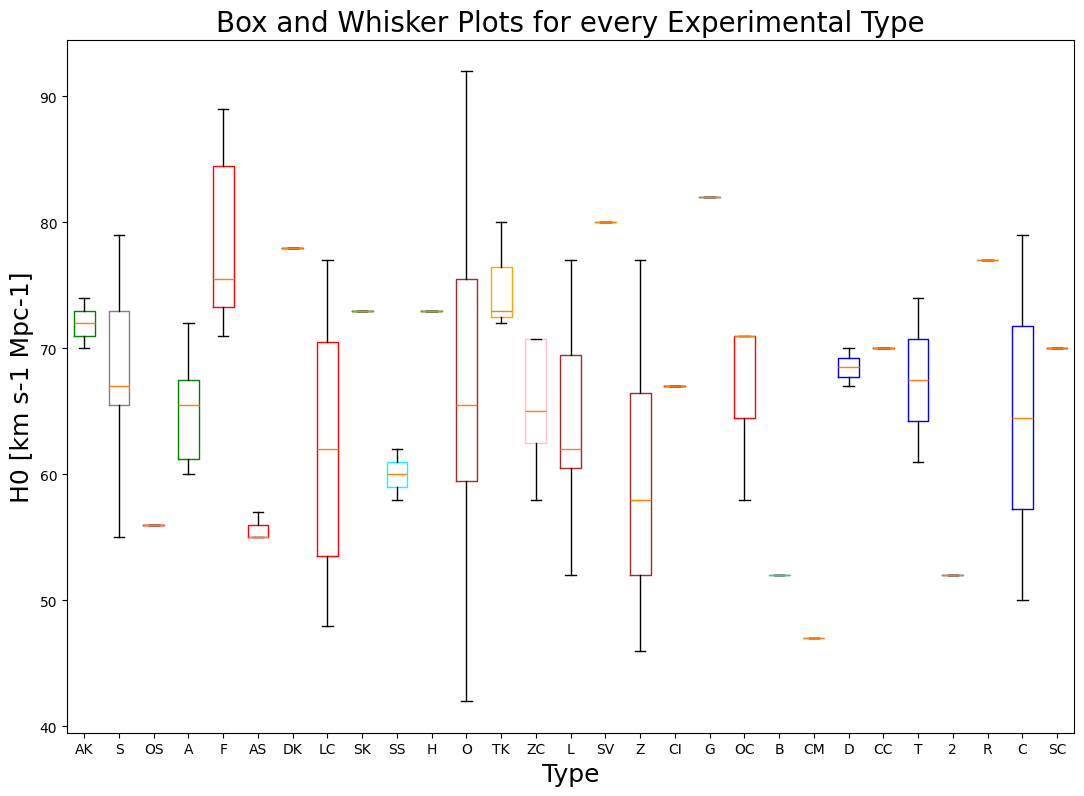

In [68]:
import random
# Initializing the figure and axes with a specific size
fig, ax = plt.subplots(figsize=(13, 9))

# Setting the initial position
position = 1

# Defining colors for each boxplot
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Generating a box and whisker plot for each DataFrame
for i, (type_val, dataframe) in enumerate(dataframes.items()):
    items_count = len(dataframe)
    box_plot = ax.boxplot(dataframe['H0 [km s-1 Mpc-1]'], positions=[position], labels=[type_val], widths=0.7, showfliers=False, boxprops=dict(color=random.choice(colors)))

    position += 1

# Setting the title and labels
ax.set_title('Box and Whisker Plots for every Experimental Type', fontsize=20)
ax.set_ylabel('H0 [km s-1 Mpc-1]', fontsize=18)
ax.set_xlabel('Type', fontsize=18)


# Displaying the plot
plt.show()


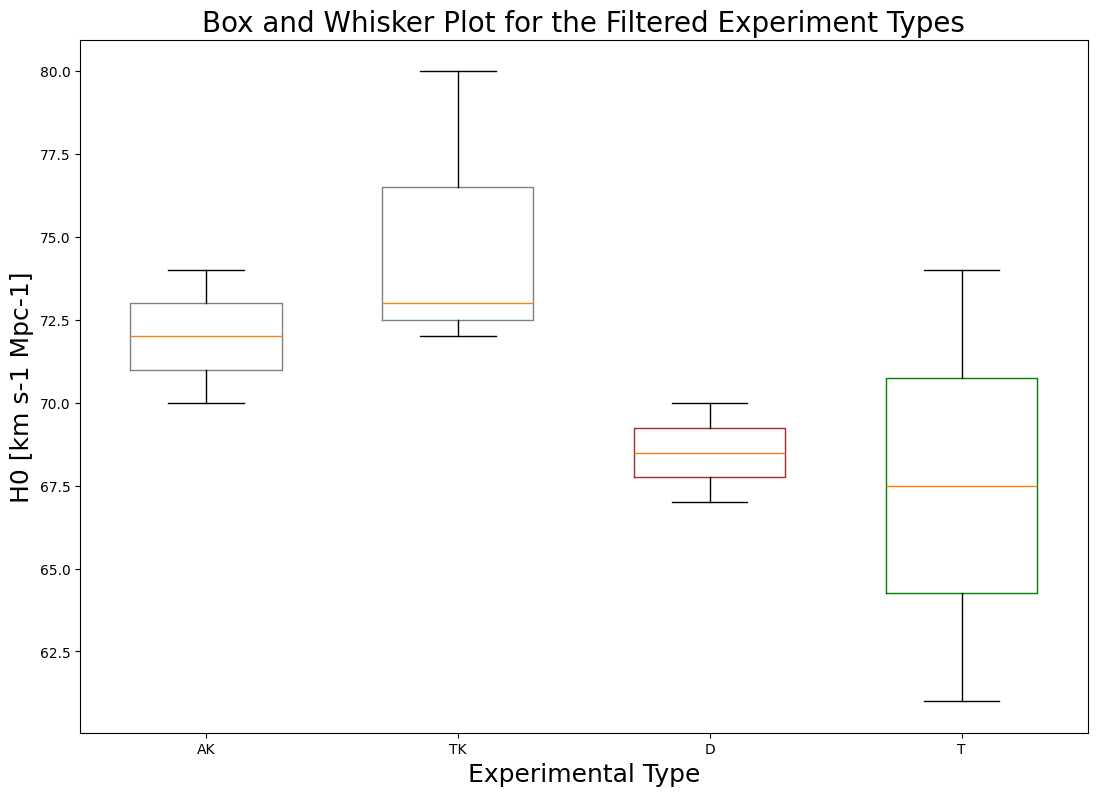

In [70]:
# Filtering the dictionary based on specific conditions
filtered_hubble2 = {k: v for k, v in dataframes.items() if (len(v) > 1) and all(59 <= h <= 81 for h in v['H0 [km s-1 Mpc-1]']) and (66 <= v['H0 [km s-1 Mpc-1]'].mean() <= 76)}

# Initializing the figure and axes with a specific size
fig, ax = plt.subplots(figsize=(13, 9))

# Setting the initial position
position = 1

# Generating a box and whisker plot for each DataFrame in the filtered dictionary
for type_val, dataframe in filtered_hubble2.items():
    items_count = len(dataframe)
    box_plot = ax.boxplot(dataframe['H0 [km s-1 Mpc-1]'], positions=[position], labels=[type_val], widths=0.6, showfliers=False, boxprops=dict(color=random.choice(colors)))

    position += 1

# Setting the title and labels

ax.set_ylabel('H0 [km s-1 Mpc-1]', fontsize=18)
ax.set_xlabel('Experimental Type', fontsize=18)
ax.set_title('Box and Whisker Plot for the Filtered Experiment Types', fontsize=20)


# Displaying the plot
plt.show()

In [41]:
# Creating dictionaries to hold the mean and standard deviation results
average_values = {}
standard_deviations = {}

# Computing mean and standard deviation for each dataset
for type_val, dataframe in filtered_hubble2.items():
    average_values[type_val] = dataframe['H0 [km s-1 Mpc-1]'].mean()
    standard_deviations[type_val] = dataframe['H0 [km s-1 Mpc-1]'].std()

# Initializing total mean and standard deviation
total_mean = 0
total_std_dev = 0 

# Printing the results and calculate the total mean and standard deviation
for type_val, mean in average_values.items():
    print(f"Mean for {type_val}: {mean:.4f}")
    total_mean += mean

for type_val, std_dev in standard_deviations.items():
    print(f"Standard Deviation for {type_val}: {std_dev:.4f}")
    total_std_dev += std_dev

# Printing the average mean and standard deviation for the filtered data set (bootstrapping)
print('The average mean for the filtered data set is', total_mean/4)
print ('The average standard deviation for the filtered data set is', total_std_dev/4)

Mean for AK: 72.0000
Mean for TK: 75.0000
Mean for D: 68.5000
Mean for T: 67.5000
Standard Deviation for AK: 2.0000
Standard Deviation for TK: 4.3589
Standard Deviation for D: 2.1213
Standard Deviation for T: 9.1924
The average mean for the filtered data set is 70.75
The average standard deviation for the filtered data set is 4.418151860631358
